In [1]:
import igraph as ig
print(ig.__version__)

from random import (random, choices)
from math import copysign
import matplotlib.pyplot as plt
from numpy import linspace
from multiprocessing import Pool as ThreadPool


0.7.1


In [202]:
# Constants
Ns = [200, 200000] # Graph size, also MCS substeps for step
k = 14 # Average degree
q = 2 # Neighbourhood taken into consideration
ps = [.2, .4,] # Chance of nonconformistic behaviour 
cs = [.6, .7, .8, .9] # Initial concentration of UP spins
MCS = 10000

In [5]:
def init_c(g: ig.Graph, c: float):
    for v in g.vs:
        if random() < c:
            v.update_attributes({'S':1})
        else:
            v.update_attributes({'S':-1})

def pos_c(g: ig.Graph):
    return sum(list(filter(lambda x: x > 0, map(lambda x: x.attributes()['S'], g.vs))))/len(g.vs)
            
def mcstep(g: ig.Graph, q, p):
    for v in g.vs:
        vote = 0;
        for n in choices(v.neighbors(), k=q):
            vote += n.attributes()['S']
        if abs(vote) == q:
            if random() < p:
                v.update_attributes({'S':int(copysign(1, -vote))})
            else:
                v.update_attributes({'S':int(copysign(1, vote))})
 
                                                                                                     

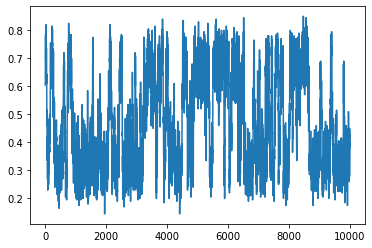

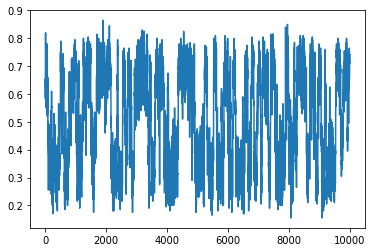

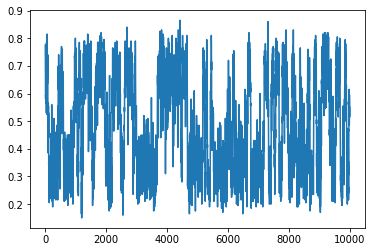

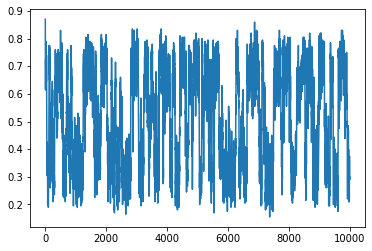

In [203]:
# a1)
MCS = 10000
networks = []
for c in cs:
    tmp =  ig.Graph.Erdos_Renyi(Ns[0], m=Ns[0]*k)
    init_c(tmp, c)
    networks.append(tmp)
    
for network in networks:
    results = []
    results.append(pos_c(network))
    for i in range(MCS):
        mcstep(network, q, ps[0])
        results.append(pos_c(network))
    plt.figure()
    plt.plot(results)
#ig.plot(network, layout = network.layout_circle())
#sum(list(filter(lambda x: x > 0, map(lambda x: x.attributes()['S'], networks[3].vs))))/Ns[0]
#for network in networks:
#    print(pos_c(network))


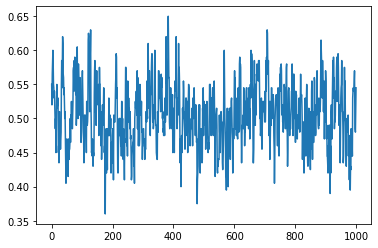

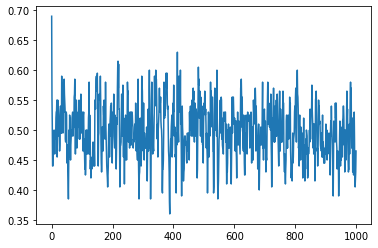

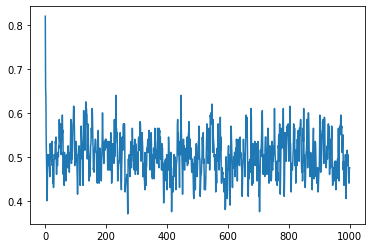

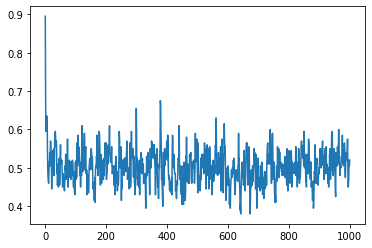

In [206]:
# a2)
MCS = 1000
networks = []
for c in cs:
    tmp =  ig.Graph.Erdos_Renyi(Ns[0], m=Ns[0]*k)
    init_c(tmp, c)
    networks.append(tmp)
    
for network in networks:
    results = []
    results.append(pos_c(network))
    for i in range(MCS):
        mcstep(network, q, ps[1])
        results.append(pos_c(network))
    plt.figure()
    plt.plot(results)


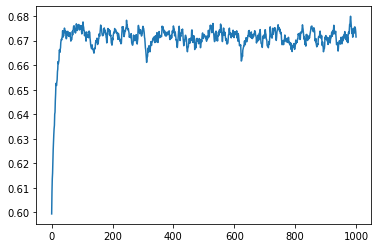

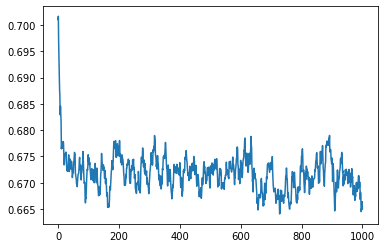

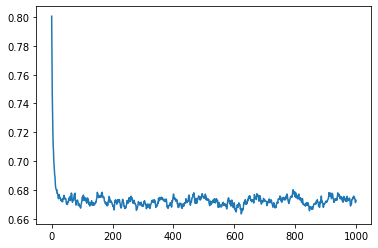

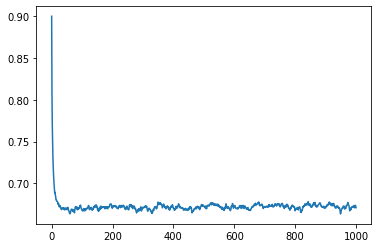

In [207]:
# a3)
MCS = 1000
networks = []
for c in cs:
    tmp =  ig.Graph.Erdos_Renyi(Ns[1], m=Ns[1]*k)
    init_c(tmp, c)
    networks.append(tmp)
    
for network in networks:
    results = []
    results.append(pos_c(network))
    for i in range(MCS):
        mcstep(network, q, ps[0])
        results.append(pos_c(network))
    plt.figure()
    plt.plot(results)

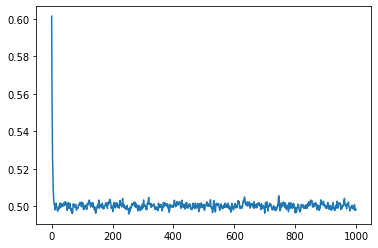

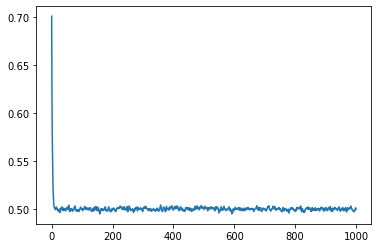

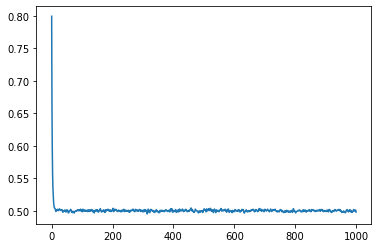

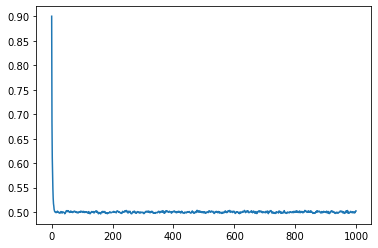

In [208]:
# a4)
MCS = 1000
networks = []
for c in cs:
    tmp =  ig.Graph.Erdos_Renyi(Ns[1], m=Ns[1]*k)
    init_c(tmp, c)
    networks.append(tmp)
    
for network in networks:
    results = []
    results.append(pos_c(network))
    for i in range(MCS):
        mcstep(network, q, ps[1])
        results.append(pos_c(network))
    plt.figure()
    plt.plot(results)

In [3]:
def stabilize(N, k, c, q, p, n):
    g = ig.Graph.Erdos_Renyi(N, m=N*k)
    init_c(g, c)
    for _ in range(n):
        mcstep(g, q, p)
    return (c, q, p, pos_c(g))
#def stab_helper(T):
#    stabilize *T

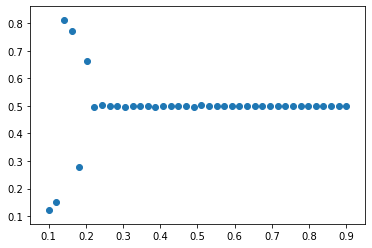

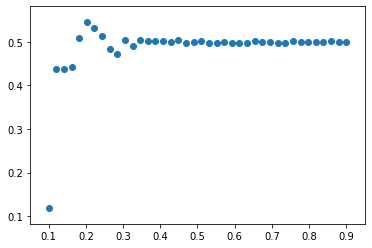

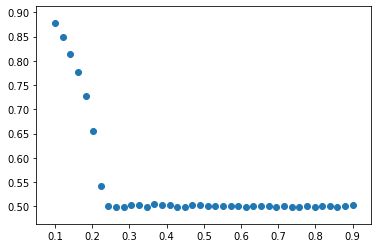

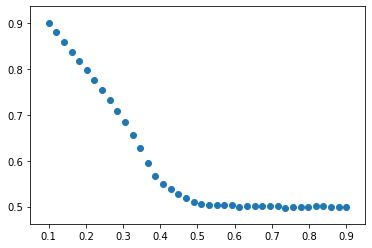

In [6]:
# b)

ps = linspace(0.1, 0.9, 40)
qs = [2, 8]
N = 100000
cs = [.5, 1]
k = 14
n = 200
results = []
#pool = ThreadPool()
#results = pool.map(stabilise, [[N, k, c, q, p, n] for c in cs for q in qs for p in ps])
#pool.close()

for (N, k, c, q, p, n) in [(N, k, c, q, p, n) for c in cs for q in qs for p in ps]:
    results.append(stabilize(N, k, c, q, p, n))

    
for c in cs:
    for q in qs:
        result = list(filter(lambda x: x[1] == q, filter(lambda x: x[0] == c, results)))
        plt.figure()
        plt.scatter([i[2] for i in result],[i[3] for i in result])